In [74]:
import requests
import json
import sys
import numpy as np
import pandas as pd
import csv
from  keys  import  client_id, api_key
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [316]:
df_fp_ny = pd.read_csv('database/Film Production_NYC_database.csv') 
df_fp_la = pd.read_csv('database/Film Production_Los Angeles_database.csv')
df_fp_ga = pd.read_csv('database/Film Production_Atlanta_database.csv')

In [10]:
df_fer_ny =  pd.read_csv('database/Film Equipment Rental_New York_database.csv')
df_fer_la =  pd.read_csv('database/Film Equipment Rental_Los Angeles_database.csv')

In [72]:
df_prod_ny = pd.read_csv('database/Production House_New York_database.csv')
df_prod_la = pd.read_csv('database/Production House_Los Angeles_database.csv')
df_prod_ga = pd.read_csv('database/Production House_Atlanta_database.csv')

In [313]:
df_fp_ny_reviews =  pd.read_csv('database/Film Production_NYC_reviews.csv')
df_fp_la_reviews = pd.read_csv('database/Film Production_Los Angeles_database.csv') 
# df_fp_ga_reviews = pd.read_csv('database/Film Production_Atlanta_database.csv') 

df_prod_ny_reviews = pd.read_csv('database/Production House_New York_reviews.csv')
df_prod_la_reviews = pd.read_csv('database/Production House_Los Angeles_reviews.csv')
df_prod_ga_reviews = pd.read_csv('database/Production House_Atlanta_reviews.csv')

df_fer_ny_reviews = pd.read_csv('database/Film Equipment Rental_New York_reviews.csv')
df_fer_la_reviews = pd.read_csv('database/Film Equipment Rental_Los Angeles_reviews.csv')

In [320]:
df_fp_ny.describe()
# '''
# More money in NYC than LA, not by much
# Could be impacted by amount of places that have price listed
# Competition and Property value are things to keep in mind 
# Slightly larger range in NYC than LA, but mostly modest-high cost range (std)

# '''

,Rating,Review Count,Price
count,297.000000,297.000000,11.000000
mean,4.301347,20.026936,2.363636
std,1.146793,72.959582,0.924416
min,1.000000,1.000000,1.000000
25%,4.000000,1.000000,2.000000
50%,5.000000,4.000000,2.000000
75%,5.000000,13.000000,2.500000
max,5.000000,890.000000,4.000000


In [6]:
df_prod_la.describe()
# '''
# LA Reviews the most out of the 3 cities
# Mean rating is much higher than the other cities
# LA has highest std, could have outliers bringing the review count mean up 
# Find neighboorhoods that dont have high ratings to get around customer loyalty


# '''

,Rating,Review Count,Price
count,1000.000000,1000.000000,358.00000
mean,4.486500,480.234000,2.24581
std,0.552153,928.618166,0.60430
min,1.500000,1.000000,1.00000
25%,4.000000,9.000000,2.00000
50%,4.500000,57.000000,2.00000
75%,5.000000,587.500000,3.00000
max,5.000000,8638.000000,4.00000


In [7]:
df_prod_ga.describe()
# Cheper, making less money as Business owners compared to NY and LA
# Less reviews per store in GA than LA or NY, would get less customers


,Rating,Review Count,Price
count,1000.000000,1000.000000,774.000000
mean,3.804000,284.178000,2.018088
std,0.654609,388.846409,0.508335
min,1.000000,1.000000,1.000000
25%,3.500000,55.000000,2.000000
50%,4.000000,173.500000,2.000000
75%,4.000000,363.250000,2.000000
max,5.000000,3949.000000,4.000000


In [6]:
df_prod_ga.describe().loc['mean']



Rating            3.805500
Review Count    283.810000
Price             2.018135
Name: mean, dtype: float64

### Total Businesses per each Price Category
Atlanta has far more popular lower-cost service houses than New York and Los Angeles. This would make competing in such an environment as a start-up far more difficult, until we scale to the point to where we can secure talent and the ability to provide high-level services that are worthy of 4-dollar-sign prices. <br>

On the other hand, it would be worth getting the `len(parsed['total'])` of the call results per location. <br>
If the total number of production houses in Atlanta are much lower than the total in NYC and LA, then the market might be too saturated in the larger cities, making it difficult for new competition. 

Beyond the scope of this project, there are some other considerations that could be taken, such as: 
- commercial real estate prices per location (possibly through other API such as Zilliow)
- other costs of doing business per location

🥳


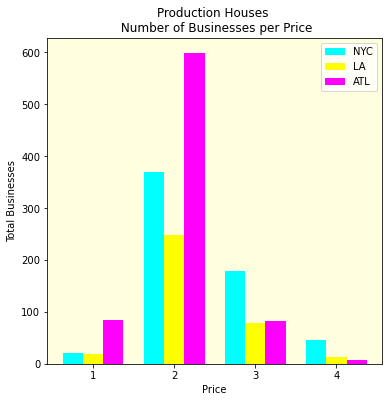

In [34]:
price_review_cnt_title = 'Production Houses \n Number of Businesses per Price'
x_label = 'Price'
y_label = 'Total Businesses'
width = .25


x1 = df_prod_ny['Price'].value_counts().sort_index().index[:4]
y1 = df_prod_ny['Price'].value_counts().sort_index()

x2 = df_prod_la['Price'].value_counts().sort_index().index[:4]
y2 = df_prod_la['Price'].value_counts().sort_index()

x3 = df_prod_ga['Price'].value_counts().sort_index().index[:4]
y3 = df_prod_ga['Price'].value_counts().sort_index()

# xtik = [1, 2, 3, 4]

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1, 2, 3, 4])
# ax.set_xticks(['$'*i for i in xtik])

ax.bar(x1-(width), y1, width, color="cyan", align='center')
ax.bar(x2, y2, width, color="yellow", align= 'center')
ax.bar(x3+(width), y3, width, color="magenta", align= 'center')
ax.set_title(price_review_cnt_title)
ax.set_facecolor("lightyellow")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

### Insights:
- Atlanta has way more reviews for cheaper production houses
  - this means that there would be more competition in Atlanta if we are trying to undercut the competition
- Likewise, **all** locations have the most reviews in the *second lowest price range*
  - this indicates that in all locations, we would attract the most customers by targeting that price range

In [1]:
sns.scatterplot(df_prod_ny['Price'], df_prod_la['Price', )

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-1-1047f40ba5a3>, line 1)

🥳


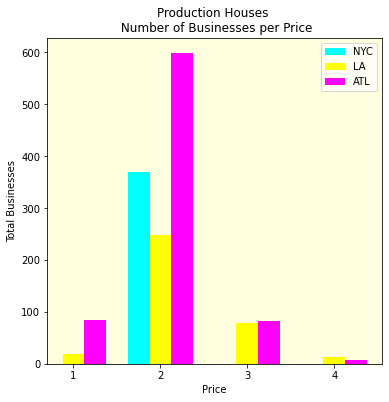

In [35]:
price_review_cnt_title = 'Production Houses \n Number of Businesses per Price'
x_label = 'Price'
y_label = 'Total Businesses'
width = .25


x1 = df_prod_ny['Price'].median()
y1 = df_prod_ny['Price'].value_counts().sort_index()

x2 = df_prod_la['Price'].value_counts().sort_index().index[:4]
y2 = df_prod_la['Price'].value_counts().sort_index()

x3 = df_prod_ga['Price'].value_counts().sort_index().index[:4]
y3 = df_prod_ga['Price'].value_counts().sort_index()

# xtik = [1, 2, 3, 4]

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1, 2, 3, 4])
# ax.set_xticks(['$'*i for i in xtik])

ax.bar(x1-(width), y1, width, color="cyan", align='center')
ax.bar(x2, y2, width, color="yellow", align= 'center')
ax.bar(x3+(width), y3, width, color="magenta", align= 'center')
ax.set_title(price_review_cnt_title)
ax.set_facecolor("lightyellow")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

#### Insights:

### Rating / Review Count

In [26]:
df_prod_ga['Rating']

0      5.0
1      5.0
2      5.0
3      4.5
4      5.0
      ... 
995    3.5
996    2.5
997    2.5
998    3.0
999    4.0
Name: Rating, Length: 1000, dtype: float64

In [27]:
x1 = df_prod_nyc['Rating'].value_counts().sort_index().index[:5]
x1

Float64Index([2.0, 2.5, 3.0, 3.5, 4.0], dtype='float64')

In [28]:
x2 = df_prod_la['Rating'].value_counts().sort_index().index[:5]
x2

Float64Index([1.5, 2.5, 3.0, 3.5, 4.0], dtype='float64')

In [29]:
x3 = df_prod_ga['Rating'].value_counts().sort_index().index[:5]
x3

Float64Index([1.0, 1.5, 2.0, 2.5, 3.0], dtype='float64')

In [30]:
df_prod_nyc['Rating'].value_counts().sort_index().index

Float64Index([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64')

In [ ]:
color = 'steelblue', color = 'indianred', color = 'palegreen'
'lightsteelblue' 'palevioletred' 'greenyellow'

🥳


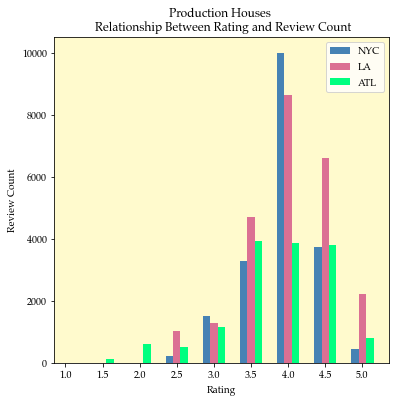

In [160]:
rating_review_cnt_title = 'Production Houses \n Relationship Between Rating and Review Count'
x_label = 'Rating'
y_label = 'Review Count'
width = .1

x1 = df_prod_ny['Rating']
y1 = df_prod_ny['Review Count']

x2 = df_prod_la['Rating']
y2 = df_prod_la['Review Count']

x3 = df_prod_ga['Rating']
y3 = df_prod_ga['Review Count']

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

ax.bar(x1-(width), y1, width, color="steelblue", align='center')
ax.bar(x2, y2, width, color='palevioletred', align= 'center')
ax.bar(x3+(width), y3, width, color='springgreen', align= 'center')
ax.set_title(rating_review_cnt_title)
ax.set_facecolor('lemonchiffon')

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

#### Insights: 

### Rating / Price

In [53]:
ny_prod_high_rating_price2

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
21,DiJiFi,"['1166 Manhattan Ave', 'Ste 201', 'Brooklyn, N...",Brooklyn,4.5,165,"{'latitude': 40.7382584, 'longitude': -73.9549...",2.0,CwBYC8nVLbG7KjVU6nwR4A,"[{'alias': 'photographystores', 'title': 'Phot..."
27,Kings County Distillery,"['299 Sands St', 'Bldg 121', 'Brooklyn, NY 112...",Brooklyn,4.5,124,"{'latitude': 40.6997470891061, 'longitude': -7...",2.0,J3ZLnLE-DZzrJu2ryEmrEw,"[{'alias': 'distilleries', 'title': 'Distiller..."
31,Eataly Flatiron,"['200 5th Ave', 'New York, NY 10010']",New York,4.0,5652,"{'latitude': 40.74195877796, 'longitude': -73....",2.0,a0IET3_yCFcO36OqGSsisg,"[{'alias': 'italian', 'title': 'Italian'}, {'a..."
44,The Malt House,"['206 Thompson St', 'New York, NY 10012']",New York,4.0,424,"{'latitude': 40.728647, 'longitude': -73.999383}",2.0,NT2mKx3_kxO9tpjeP2Sv6Q,"[{'alias': 'gastropubs', 'title': 'Gastropubs'..."
59,Forest Hills Station House,"['106-11 71st Ave', 'Forest Hills, NY 11375']",Forest Hills,4.0,1124,"{'latitude': 40.7199422, 'longitude': -73.8451...",2.0,NVp1S29NLR573Lc4ZvICKw,"[{'alias': 'gastropubs', 'title': 'Gastropubs'..."
...,...,...,...,...,...,...,...,...,...
986,Parc Oasis Oyster Bar,"['6403 11th Ave', 'Brooklyn, NY 11219']",Brooklyn,4.0,150,"{'latitude': 40.6290427824765, 'longitude': -7...",2.0,v4cXt2qe9pq_XWJflL5ISg,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a..."
987,Boulton & Watt,"['5 Ave A', 'New York, NY 10009']",New York,4.0,678,"{'latitude': 40.722520164329694, 'longitude': ...",2.0,Cz6It2NB_QBXCjnlsWGZSA,"[{'alias': 'newamerican', 'title': 'American (..."
988,HinoMaru Ramen,"['33-18 Ditmars Blvd', 'Astoria, NY 11105']",Astoria,4.0,893,"{'latitude': 40.774889916651, 'longitude': -73...",2.0,D65eObUbArHu6UiQsUasgw,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias..."
990,Jajaja Plantas Mexicana,"['63 Carmine St', 'New York, NY 10014']",New York,4.5,254,"{'latitude': 40.72979, 'longitude': -74.00455}",2.0,PHMkwS5nmo4IUXbcg0OcAg,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a..."


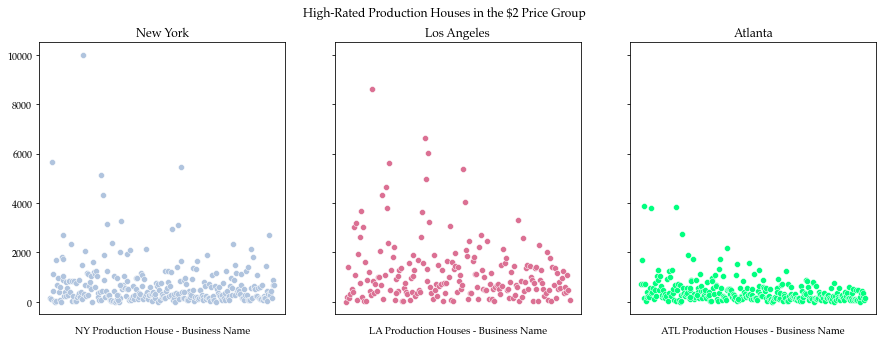

In [156]:
ny_prod_high_rating_price2 = df_prod_ny.loc[(df_prod_ny['Rating'] >= 4) & (df_prod_ny['Price'] == 2)]
la_prod_high_rating_price2 = df_prod_la.loc[(df_prod_la['Rating'] >= 4) & (df_prod_la['Price'] == 2)]
ga_prod_high_rating_price2 = df_prod_ga.loc[(df_prod_ga['Rating'] >= 4) & (df_prod_ga['Price'] == 2)]


fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('High-Rated Production Houses in the $2 Price Group')

# NY
g1 = sns.scatterplot(ax=ax[0], x= ny_prod_high_rating_price2['Name'], y= ny_prod_high_rating_price2['Review Count'].values, color = 'lightsteelblue')
ax[0].set_title('New York')

# LA
g2 = sns.scatterplot(ax=ax[1], x= la_prod_high_rating_price2['Name'], y= la_prod_high_rating_price2['Review Count'].values, color = 'palevioletred')
ax[1].set_title('Los Angeles')

# ATL
g3 = sns.scatterplot(ax=ax[2], x= ga_prod_high_rating_price2['Name'], y= ga_prod_high_rating_price2['Review Count'].values, color = 'springgreen')
ax[2].set_title('Atlanta')

g1.set(xticklabels=[])
g2.set(xticklabels=[])
g3.set(xticklabels=[])
g1.set_xlabel('NY Production House - Business Name')
g2.set_xlabel('LA Production Houses - Business Name')
g3.set_xlabel('ATL Production Houses - Business Name')
g1.tick_params(bottom=False) 
g2.tick_params(bottom=False) 
g3.tick_params(bottom=False);

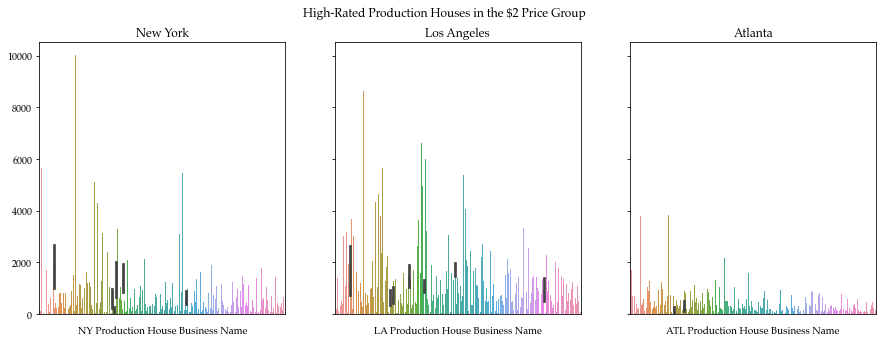

In [226]:
ny_prod_high_rating_price2 = df_prod_ny.loc[(df_prod_ny['Rating'] >= 4) & (df_prod_ny['Price'] == 2)]
la_prod_high_rating_price2 = df_prod_la.loc[(df_prod_la['Rating'] >= 4) & (df_prod_la['Price'] == 2)]
ga_prod_high_rating_price2 = df_prod_ga.loc[(df_prod_ga['Rating'] >= 4) & (df_prod_ga['Price'] == 2)]


fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('High-Rated Production Houses in the $2 Price Group')

# NY
g1 = sns.barplot(ax=ax[0], x= ny_prod_high_rating_price2['Name'], y= ny_prod_high_rating_price2['Review Count'].values,)
ax[0].set_title('New York')

# LA
g2 = sns.barplot(ax=ax[1], x= la_prod_high_rating_price2['Name'], y= la_prod_high_rating_price2['Review Count'].values)
ax[1].set_title('Los Angeles')

# ATL
g3 = sns.barplot(ax=ax[2], x= ga_prod_high_rating_price2['Name'], y= ga_prod_high_rating_price2['Review Count'].values)
ax[2].set_title('Atlanta')

g1.set(xticklabels=[])
g2.set(xticklabels=[])
g3.set(xticklabels=[])
g1.set_xlabel('NY Production House Business Name')
g2.set_xlabel('LA Production House Business Name')
g3.set_xlabel('ATL Production House Business Name')
g1.tick_params(bottom=False) 
g2.tick_params(bottom=False) 
g3.tick_params(bottom=False);

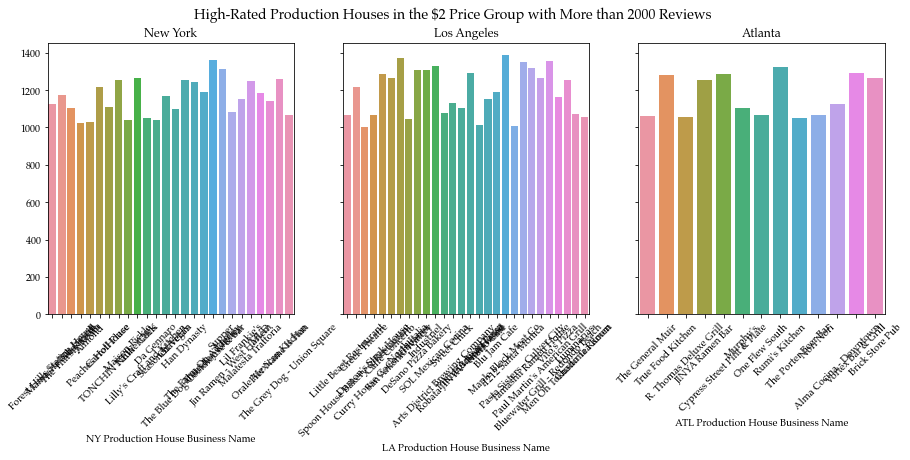

In [174]:
ny_prod_high_rating_price2 = df_prod_ny.loc[(df_prod_ny['Rating'] >= 4) & (df_prod_ny['Price'] == 2) & (df_prod_ny['Review Count'] > 1000) & (df_prod_ny['Review Count'] < 1400)]
la_prod_high_rating_price2 = df_prod_la.loc[(df_prod_la['Rating'] >= 4) & (df_prod_la['Price'] == 2) & (df_prod_la['Review Count'] > 1000) & (df_prod_la['Review Count'] < 1400)]
ga_prod_high_rating_price2 = df_prod_ga.loc[(df_prod_ga['Rating'] >= 4) & (df_prod_ga['Price'] == 2) & (df_prod_ga['Review Count'] > 1000) & (df_prod_ga['Review Count'] < 1400)]


fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('High-Rated Production Houses in the $2 Price Group with More than 2000 Reviews', weight = 'bold').set_fontsize('14')


# for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
#     axes[j,i].xaxis.set_visible(True)
#     axes[i,j].yaxis.set_visible(True)

#     for tick in axes[i,j].get_xticklabels():
#         tick.set_rotation(45)
#     for tick in axes[j,i].get_xticklabels():
#         tick.set_rotation(45)

# NY
g1 = sns.barplot(ax=ax[0], x = ny_prod_high_rating_price2['Name'], y = ny_prod_high_rating_price2['Review Count'].values)
ax[0].set_title('New York')
# LA
g2 = sns.barplot(ax=ax[1], x = la_prod_high_rating_price2['Name'], y = la_prod_high_rating_price2['Review Count'].values)
ax[1].set_title('Los Angeles')
# ATL
g3 = sns.barplot(ax=ax[2], x = ga_prod_high_rating_price2['Name'], y = ga_prod_high_rating_price2['Review Count'].values)
ax[2].set_title('Atlanta')

for tick in g1.get_xticklabels():
    tick.set_rotation(45)

for tick in g2.get_xticklabels():
    tick.set_rotation(45)

for tick in g3.get_xticklabels():
    tick.set_rotation(45)

g1.set_xlabel('NY Production House Business Name')
g2.set_xlabel('LA Production House Business Name')
g3.set_xlabel('ATL Production House Business Name');

### Finding Mistakes with our Data
- As we can see above, New York and Atlanta include several restaurants and food artisans.
   - This is likely because 'production' can mean many things, and is not unique to film
   - Other likely cause: Search is inclusive of all results that include 'house' e.g: 'house of ribs', disregarding 'production' all together
   - Beyond that, the *most popular* places on Yelp would be restaurants due to the fact that:
       - Yelp as a web directory for local businesses is primarily associated with restaurants
       - Restaurants are an industry patronized by a majority of the population (pro-consumer)...
       - ... while film production houses are industry-specific
       
#### To resolve this, let's return *only* rows that have 'film' in their categories

In [241]:
df_prod_ny[df_prod_ny['Categories'].str.contains('film')]

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
0,Urban Myth Studio,"['505 Johnson Ave', 'Brooklyn, NY 11237']",Brooklyn,5.0,4,"{'latitude': 40.708663918903, 'longitude': -73...",NaN,FOVaV6u49Hb3VEncHJ5eVg,"[{'alias': 'videofilmproductions', 'title': 'V..."
1,Hit and Run Productions,"['65 Roebling St', 'Ste 202', 'Brooklyn, NY 11...",Brooklyn,5.0,4,"{'latitude': 40.7165128, 'longitude': -73.9546...",NaN,ntnuLH-tk9Qh8n895hDV9g,"[{'alias': 'videofilmproductions', 'title': 'V..."
2,Be Electric Studios,"['1298 Willoughby Ave', 'Brooklyn, NY 11237']",Brooklyn,4.5,4,"{'latitude': 40.7052438, 'longitude': -73.9218...",NaN,lmiG3-1CZFcoQBESPa7KMw,"[{'alias': 'videofilmproductions', 'title': 'V..."
3,Starr Street Studios,"['207-A Starr St', 'Ste 3-1', 'Brooklyn, NY 11...",Brooklyn,5.0,8,"{'latitude': 40.705122, 'longitude': -73.923457}",NaN,rXjhzma0XIrxJEFt7q0tIg,"[{'alias': 'videofilmproductions', 'title': 'V..."
5,Subliminal Productions,"['One World Trade Ctr', 'Ste 8500', 'New York,...",New York,5.0,2,"{'latitude': 40.71101, 'longitude': -74.00876}",NaN,VJBTRv42LELQgpUjkwkeAQ,"[{'alias': 'videofilmproductions', 'title': 'V..."
7,Firelight Studio,"['247 Water St', 'Street Level', 'Brooklyn, NY...",Brooklyn,5.0,1,"{'latitude': 40.70308, 'longitude': -73.98392}",NaN,KxLGJUnqdIgPHtE1d8kbeQ,"[{'alias': 'videofilmproductions', 'title': 'V..."
8,Deverge Studio,"['150 W 28th St', 'Ste 600', 'New York, NY 100...",New York,5.0,5,"{'latitude': 40.74676, 'longitude': -73.99282}",NaN,a_fzR8OJ9M59h_GyRfpaIQ,"[{'alias': 'videofilmproductions', 'title': 'V..."
14,House Productions,"['447 Broadway', 'Fl 2', 'New York, NY 10013']",New York,5.0,1,"{'latitude': 40.7206058, 'longitude': -74.0014...",NaN,Ue7A0SqVEh3wQPNZTk9QCA,"[{'alias': 'videofilmproductions', 'title': 'V..."
15,Le JIT Productions,"['544 Park Ave', 'Brooklyn, NY 11205']",Brooklyn,5.0,1,"{'latitude': 40.696704, 'longitude': -73.95333}",NaN,lnCITr1_Cu4XIudZDHkzJw,"[{'alias': 'videofilmproductions', 'title': 'V..."
16,V-Productions,"['469 7th Ave', 'New York, NY 10018']",New York,5.0,1,"{'latitude': 40.7519226, 'longitude': -73.9894...",NaN,DVB8M-lrtk1lQmPu63168A,"[{'alias': 'videofilmproductions', 'title': 'V..."


### Ouch... so many NaN values for price, and all ratings seem to be 4—5!
- This won't do! Not enough data to work with to get useful insights.
- Let's see what film equipment rental data is returning...

In [250]:
df_prod_ny[df_prod_ny['Categories'].str.contains('film')]

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
0,Urban Myth Studio,"['505 Johnson Ave', 'Brooklyn, NY 11237']",Brooklyn,5.0,4,"{'latitude': 40.708663918903, 'longitude': -73...",NaN,FOVaV6u49Hb3VEncHJ5eVg,"[{'alias': 'videofilmproductions', 'title': 'V..."
1,Hit and Run Productions,"['65 Roebling St', 'Ste 202', 'Brooklyn, NY 11...",Brooklyn,5.0,4,"{'latitude': 40.7165128, 'longitude': -73.9546...",NaN,ntnuLH-tk9Qh8n895hDV9g,"[{'alias': 'videofilmproductions', 'title': 'V..."
2,Be Electric Studios,"['1298 Willoughby Ave', 'Brooklyn, NY 11237']",Brooklyn,4.5,4,"{'latitude': 40.7052438, 'longitude': -73.9218...",NaN,lmiG3-1CZFcoQBESPa7KMw,"[{'alias': 'videofilmproductions', 'title': 'V..."
3,Starr Street Studios,"['207-A Starr St', 'Ste 3-1', 'Brooklyn, NY 11...",Brooklyn,5.0,8,"{'latitude': 40.705122, 'longitude': -73.923457}",NaN,rXjhzma0XIrxJEFt7q0tIg,"[{'alias': 'videofilmproductions', 'title': 'V..."
5,Subliminal Productions,"['One World Trade Ctr', 'Ste 8500', 'New York,...",New York,5.0,2,"{'latitude': 40.71101, 'longitude': -74.00876}",NaN,VJBTRv42LELQgpUjkwkeAQ,"[{'alias': 'videofilmproductions', 'title': 'V..."
7,Firelight Studio,"['247 Water St', 'Street Level', 'Brooklyn, NY...",Brooklyn,5.0,1,"{'latitude': 40.70308, 'longitude': -73.98392}",NaN,KxLGJUnqdIgPHtE1d8kbeQ,"[{'alias': 'videofilmproductions', 'title': 'V..."
8,Deverge Studio,"['150 W 28th St', 'Ste 600', 'New York, NY 100...",New York,5.0,5,"{'latitude': 40.74676, 'longitude': -73.99282}",NaN,a_fzR8OJ9M59h_GyRfpaIQ,"[{'alias': 'videofilmproductions', 'title': 'V..."
14,House Productions,"['447 Broadway', 'Fl 2', 'New York, NY 10013']",New York,5.0,1,"{'latitude': 40.7206058, 'longitude': -74.0014...",NaN,Ue7A0SqVEh3wQPNZTk9QCA,"[{'alias': 'videofilmproductions', 'title': 'V..."
15,Le JIT Productions,"['544 Park Ave', 'Brooklyn, NY 11205']",Brooklyn,5.0,1,"{'latitude': 40.696704, 'longitude': -73.95333}",NaN,lnCITr1_Cu4XIudZDHkzJw,"[{'alias': 'videofilmproductions', 'title': 'V..."
16,V-Productions,"['469 7th Ave', 'New York, NY 10018']",New York,5.0,1,"{'latitude': 40.7519226, 'longitude': -73.9894...",NaN,DVB8M-lrtk1lQmPu63168A,"[{'alias': 'videofilmproductions', 'title': 'V..."


In [251]:
len(df_prod_ny[df_prod_ny['Categories'].str.contains('film')]) # 39...

39

In [245]:
len(df_prod_ny) # 1000... THATS A LOT OF NON-FILM RELATED NONSENSE

1000

In [297]:
len(df_fer_ny['Categories'].str.contains('film')) # 34...
len(df_fer_ny)                                    # also 34

len(df_fer_la['Categories'].str.contains('film')) # 120...
len(df_fer_la)                                    # also 120

print((len(df_fer_ny['Categories'].str.contains('film')), len(df_fer_ny)), (len(df_fer_la['Categories'].str.contains('film')), len(df_fer_la)))

(34, 34) (120, 120)


In [318]:
len(df_fp_ny) # 297 ... much better!
# len(df_fp_la) # 1000

297

### Ok, so despite having fewer results than the Production House Data, *at least we know* all are relevant to film!

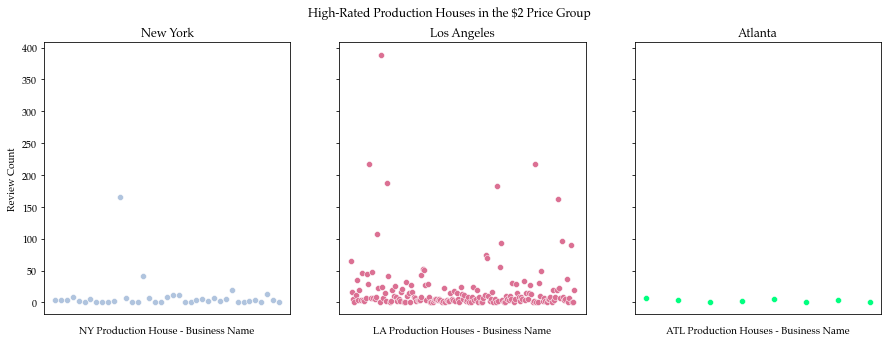

In [261]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('High-Rated Production Houses in the $2 Price Group')

# NY
g1 = sns.scatterplot(ax=ax[0], x = df_prod_ny[df_prod_ny['Categories'].str.contains('film')]['Name'], y = df_prod_ny[df_prod_ny['Categories'].str.contains('film')]['Review Count'].values, color = 'lightsteelblue')
ax[0].set_title('New York')

# LA
g2 = sns.scatterplot(ax=ax[1], x = df_prod_la[df_prod_la['Categories'].str.contains('film')]['Name'], y = df_prod_la[df_prod_la['Categories'].str.contains('film')]['Review Count'].values, color = 'palevioletred')
ax[1].set_title('Los Angeles')

# ATL
g3 = sns.scatterplot(ax=ax[2], x = df_prod_ga[df_prod_ga['Categories'].str.contains('film')]['Name'], y = df_prod_ga[df_prod_ga['Categories'].str.contains('film')]['Review Count'].values, color = 'springgreen')
ax[2].set_title('Atlanta')

g1.set(xticklabels=[])
g2.set(xticklabels=[])
g3.set(xticklabels=[])
g1.set_xlabel('NY Production House - Business Name')
g2.set_xlabel('LA Production Houses - Business Name')
g3.set_xlabel('ATL Production Houses - Business Name')
g1.set_ylabel('Review Count')
# ax[2].set_ylabel('Review Count') # These don't seem to do nothin', unfortunately
# g3.set_ylabel('Review Count')

g1.tick_params(bottom=False) 
g2.tick_params(bottom=False) 
g3.tick_params(bottom=False);

### Let's make these variables easier to work with...

In [322]:
fp_ny = df_fp_ny[df_fp_ny['Categories'].str.contains('film')]
fp_la = df_fp_la[df_fp_la['Categories'].str.contains('film')]

In [324]:
len(fp_ny)
len(fp_la)

660

In [262]:
ph_ny = df_prod_ny[df_prod_ny['Categories'].str.contains('film')]
ph_la = df_prod_la[df_prod_la['Categories'].str.contains('film')]
ph_ga = df_prod_ga[df_prod_ga['Categories'].str.contains('film')] # Only 8 total

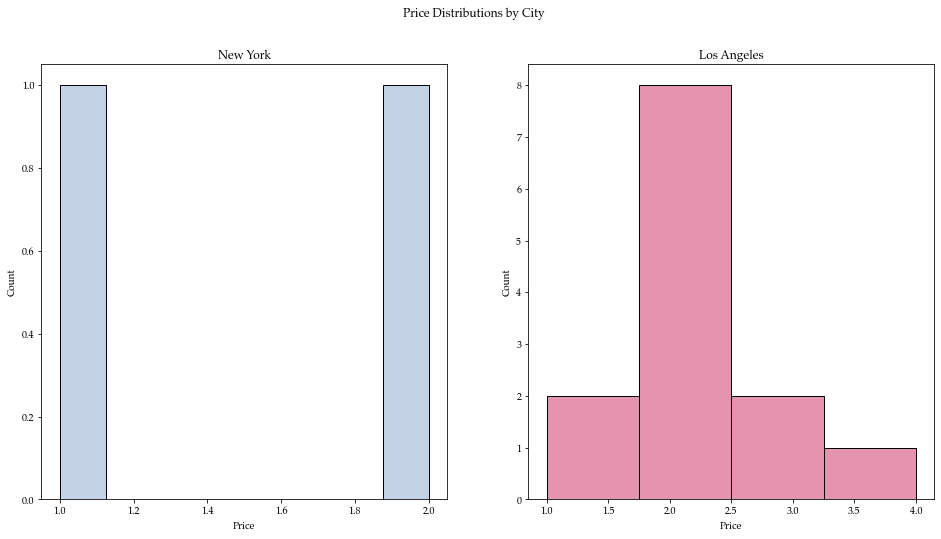

In [300]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
fig.suptitle('Price Distributions by City')

# NY
ny1 = sns.histplot(x = ph_ny['Price'], ax=ax[0], bins = 8, color = 'lightsteelblue')
ax[0].set_title('New York')
                   
# LA
la1 = sns.histplot(x = ph_la['Price'], ax=ax[1], bins = 4, color = 'palevioletred')
ax[1].set_title('Los Angeles');

# ny1.tick_params(bottom=False) 
# la1.tick_params(bottom=False) 

In [283]:
ph_ny['Price']

0      NaN
1      NaN
2      NaN
3      NaN
5      NaN
7      NaN
8      NaN
14     NaN
15     NaN
16     NaN
18     NaN
21     2.0
22     NaN
23     NaN
25     NaN
26     NaN
36     NaN
40     NaN
41     NaN
50     NaN
53     NaN
54     NaN
62     NaN
69     1.0
70     NaN
80     NaN
85     NaN
92     NaN
97     NaN
103    NaN
121    NaN
127    NaN
155    NaN
184    NaN
187    NaN
257    NaN
363    NaN
372    NaN
865    NaN
Name: Price, dtype: float64

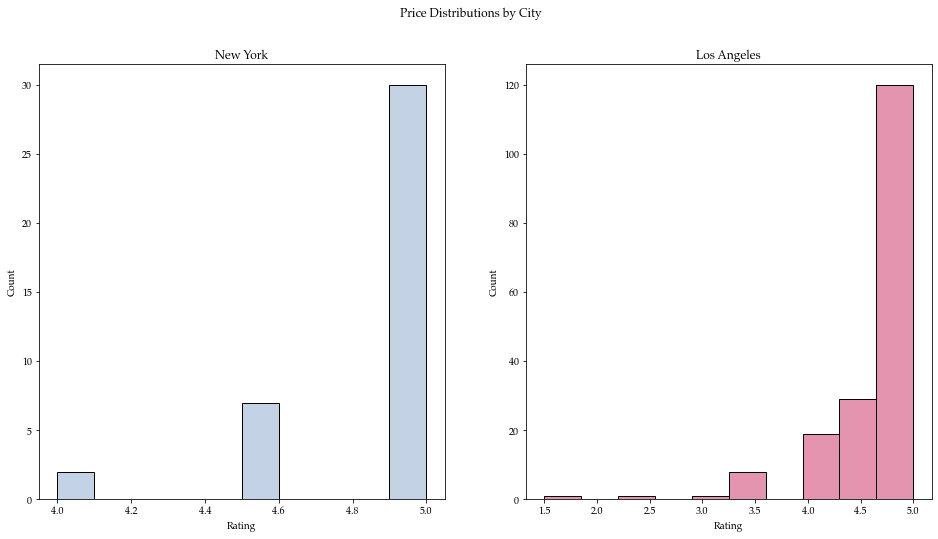

In [299]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
fig.suptitle('Price Distributions by City')

ny2 = sns.histplot(x = ph_ny['Rating'], ax=ax[0], bins = 10, color = 'lightsteelblue')
ax[0].set_title('New York')

la2 = sns.histplot(x = ph_la['Rating'], ax=ax[1], bins = 10, color = 'palevioletred')
ax[1].set_title('Los Angeles');

In [284]:
ph_ny['Rating']

0      5.0
1      5.0
2      4.5
3      5.0
5      5.0
7      5.0
8      5.0
14     5.0
15     5.0
16     5.0
18     5.0
21     4.5
22     4.5
23     5.0
25     5.0
26     5.0
36     5.0
40     5.0
41     5.0
50     5.0
53     4.5
54     4.5
62     5.0
69     5.0
70     5.0
80     4.0
85     5.0
92     4.5
97     5.0
103    5.0
121    4.5
127    5.0
155    5.0
184    5.0
187    5.0
257    5.0
363    5.0
372    4.0
865    5.0
Name: Rating, dtype: float64

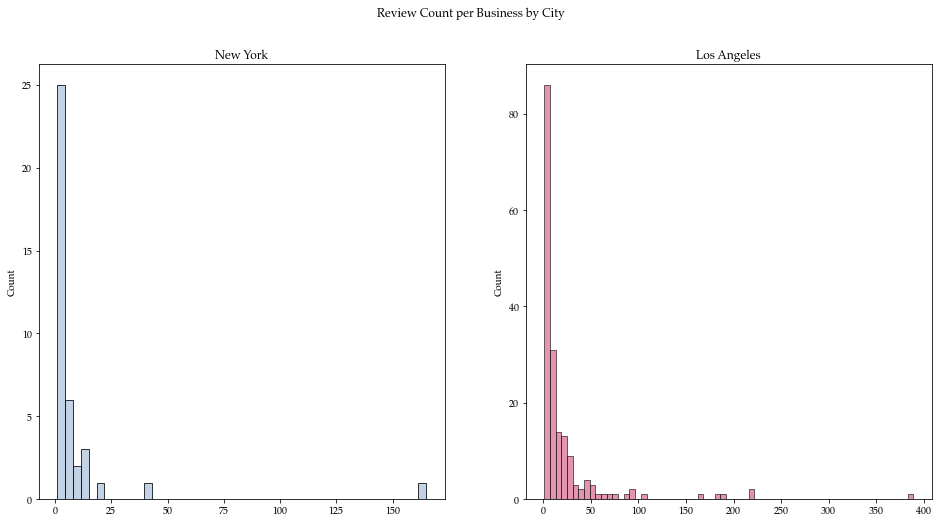

In [298]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
fig.suptitle('Review Count per Business by City')

ny3 = sns.histplot(x = ph_ny['Review Count'].values, ax=ax[0], color = 'lightsteelblue')
ax[0].set_title('New York')

la3 = sns.histplot(x = ph_la['Review Count'].values, ax=ax[1], color = 'palevioletred')
ax[1].set_title('Los Angeles');

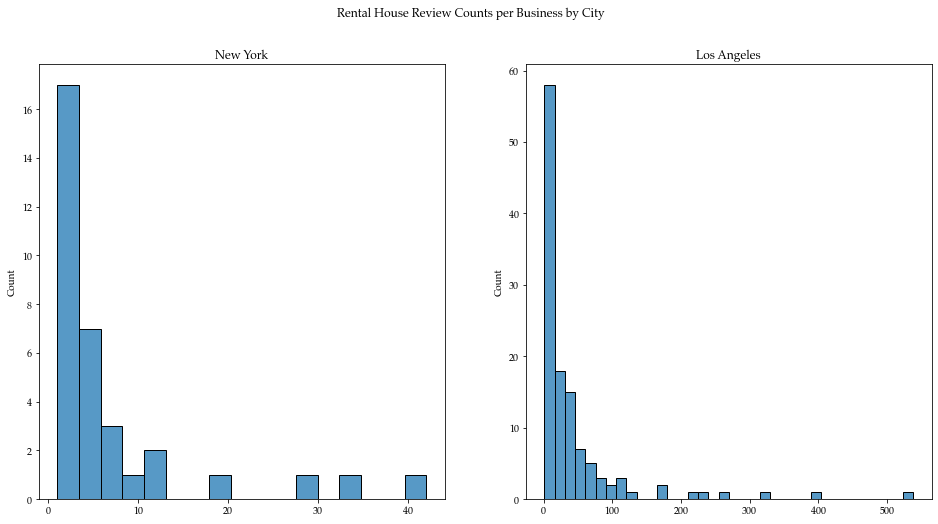

In [302]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
fig.suptitle('Rental House Review Counts per Business by City')

ny3 = sns.histplot(x = df_fer_ny['Review Count'].values, ax=ax[0], color = 'lightsteelblue')
ax[0].set_title('New York')

la3 = sns.histplot(x = df_fer_la['Review Count'].values, ax=ax[1], color = 'palevioletred')
ax[1].set_title('Los Angeles');

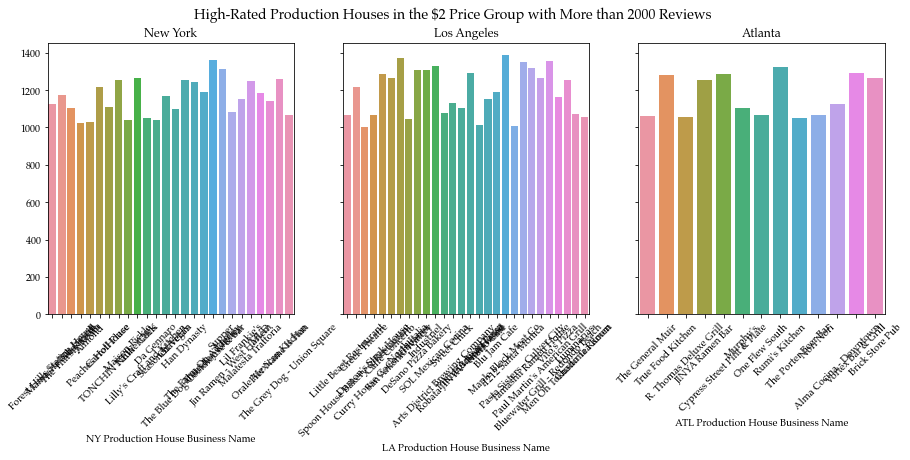

In [227]:
ny_prod_high_rating_price2 = df_prod_ny.loc[(df_prod_ny['Rating'] >= 4) & (df_prod_ny['Price'] == 2) & (df_prod_ny['Review Count'] > 1000) & (df_prod_ny['Review Count'] < 1400)]
la_prod_high_rating_price2 = df_prod_la.loc[(df_prod_la['Rating'] >= 4) & (df_prod_la['Price'] == 2) & (df_prod_la['Review Count'] > 1000) & (df_prod_la['Review Count'] < 1400)]
ga_prod_high_rating_price2 = df_prod_ga.loc[(df_prod_ga['Rating'] >= 4) & (df_prod_ga['Price'] == 2) & (df_prod_ga['Review Count'] > 1000) & (df_prod_ga['Review Count'] < 1400)]


fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('High-Rated Production Houses in the $2 Price Group with More than 2000 Reviews', weight = 'bold').set_fontsize('14')


# for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
#     axes[j,i].xaxis.set_visible(True)
#     axes[i,j].yaxis.set_visible(True)

#     for tick in axes[i,j].get_xticklabels():
#         tick.set_rotation(45)
#     for tick in axes[j,i].get_xticklabels():
#         tick.set_rotation(45)

# NY
g1 = sns.barplot(ax=ax[0], x = ny_prod_high_rating_price2['Name'], y = ny_prod_high_rating_price2['Review Count'].values)
ax[0].set_title('New York')
# LA
g2 = sns.barplot(ax=ax[1], x = la_prod_high_rating_price2['Name'], y = la_prod_high_rating_price2['Review Count'].values)
ax[1].set_title('Los Angeles')
# ATL
g3 = sns.barplot(ax=ax[2], x = ga_prod_high_rating_price2['Name'], y = ga_prod_high_rating_price2['Review Count'].values)
ax[2].set_title('Atlanta')

for tick in g1.get_xticklabels():
    tick.set_rotation(45)

for tick in g2.get_xticklabels():
    tick.set_rotation(45)

for tick in g3.get_xticklabels():
    tick.set_rotation(45)

g1.set_xlabel('NY Production House Business Name')
g2.set_xlabel('LA Production House Business Name')
g3.set_xlabel('ATL Production House Business Name');

🥳


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


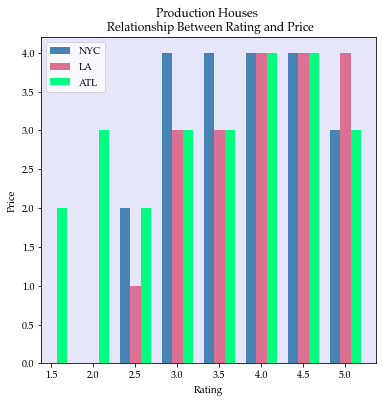

In [158]:
rating_price_title = 'Production Houses \n Relationship Between Rating and Price'
x_label = 'Rating'
y_label = 'Price'
width = .125

x1 = df_prod_nyc['Rating']
y1 = df_prod_nyc['Price']

x2 = df_prod_la['Rating']
y2 = df_prod_la['Price']

x3 = df_prod_ga['Rating']
y3 = df_prod_ga['Price']

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

ax.bar(x1-(width), y1, width, color="steelblue", align='center')
ax.bar(x2, y2, width, color="palevioletred", align= 'center')
ax.bar(x3+(width), y3, width, color="springgreen", align= 'center')
ax.set_title(rating_price_title)
ax.set_facecolor("lavender")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

### Insights: 

Though not a great visualization, note what the above tells us about New York: <br> 
- that there are no low-rated production houses
- in fact, the highest rated production houses seem to have the lowest price
- this insight suggests that 

## Same Price / Rating compared to Review Count for each location

In [ ]:
Price 2 / 4 - 5 rating

🥳


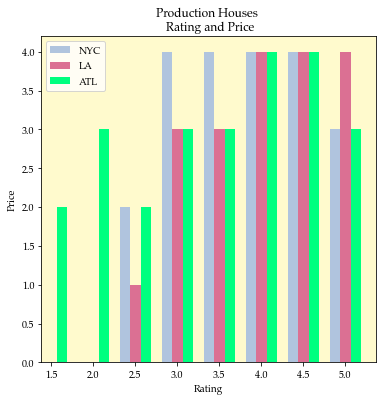

In [159]:
rating_price_title = 'Production Houses \n Rating and Price'
x_label = 'Rating'
y_label = 'Price'
width = .125

x1 = df_prod_nyc['Rating']
y1 = df_prod_nyc['Price']

x2 = df_prod_la['Rating']
y2 = df_prod_la['Price']

x3 = df_prod_ga['Rating']
y3 = df_prod_ga['Price']

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

ax.bar(x1-(width), y1, width, color = 'lightsteelblue', align = 'center')
ax.bar(x2, y2, width, color = 'palevioletred', align = 'center')
ax.bar(x3+(width), y3, width, color = 'springgreen', align = 'center')
ax.set_title(rating_price_title)
ax.set_facecolor('lemonchiffon')

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

In [141]:
df_prod_nyc[['Price', 'Rating']]

,Price,Rating
0,NaN,5.0
1,NaN,5.0
2,NaN,4.5
3,NaN,5.0
4,NaN,5.0
...,...,...
995,NaN,4.0
996,2.0,4.0
997,2.0,4.0
998,2.0,4.0


In [144]:
df_prod_nyc.dropna()

,Name,Address,City,Rating,Review Count,Coordinates,Price
5,Chart House,"['1700 Harbor Blvd', 'Weehawken, NJ 07086']",Weehawken,4.0,1526,"{'latitude': 40.7607, 'longitude': -74.018038}",3.0
10,Del Frisco's Double Eagle Steakhouse,"['1221 Ave Of The Americas', 'New York, NY 100...",New York,4.5,3028,"{'latitude': 40.759412, 'longitude': -73.982221}",4.0
11,MAMA'S TOO!,"['2750 Broadway', 'New York, NY 10025']",New York,3.5,404,"{'latitude': 40.80084, 'longitude': -73.96766}",2.0
12,House of Yes,"['2 Wyckoff Ave', 'Brooklyn, NY 11237']",Brooklyn,4.0,296,"{'latitude': 40.70686, 'longitude': -73.92353}",1.0
17,The Stone House at Clove Lakes,"['1150 Clove Rd', 'Staten Island, NY 10301']",Staten Island,3.5,222,"{'latitude': 40.6179128, 'longitude': -74.1082...",3.0
...,...,...,...,...,...,...,...
992,Sinigual,"['640 Third Ave', 'New York, NY 10017']",New York,3.5,873,"{'latitude': 40.7503161990978, 'longitude': -7...",2.0
996,Bonafini,"['663 Flatbush Ave', 'Brooklyn, NY 11225']",Brooklyn,4.0,363,"{'latitude': 40.65699, 'longitude': -73.959912}",2.0
997,Izakaya MEW,"['53 W 35th St', 'New York, NY 10001']",New York,4.0,2342,"{'latitude': 40.750148, 'longitude': -73.98632...",2.0
998,Tavola,"['488 9th Ave', 'New York, NY 10018']",New York,4.0,972,"{'latitude': 40.755403, 'longitude': -73.994516}",2.0


<AxesSubplot:xlabel='Rating', ylabel='Price'>

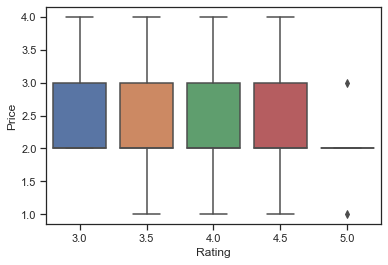

In [145]:
sns.boxplot(x="Rating", y="Price", data=df_prod_nyc.dropna())
# boxplot = sns.boxplot(data=df_prod_nyc["Price"])


# Sactter plot gitter(?) moves dots to be able to view (mpl)
# make bubbles bigger for more total reviews

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

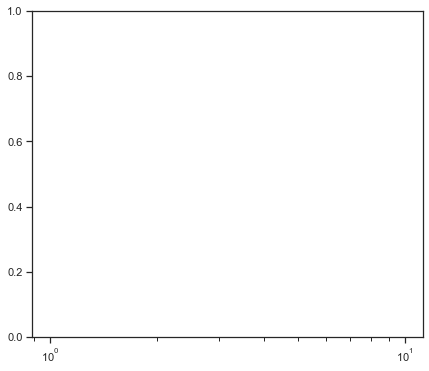

In [132]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset(df_prod_nyc)

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [118]:
df_prod_nyc['Rating'].mean()

4.186

In [120]:
df_prod_nyc['Rating'].median()

4.0

In [119]:
df_prod_nyc['Price'].mean()

2.4009819967266774

In [121]:
df_prod_nyc['Price'].median()

2.0

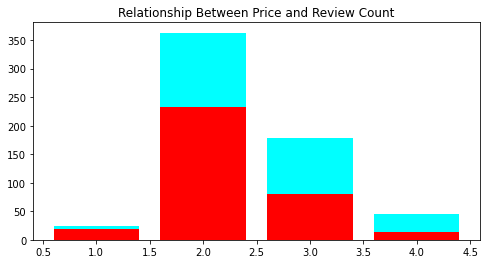

In [31]:
scatter_plot_title = 'Relationship Between Price and Review Count'
x_label = 'Review Count'
y_label = 'Price'
# your code here
tackle_figure, ax = plt.subplots(figsize=(8, 4))



# y1 = df_prod_nyc['Price'].value_counts().sort_index()
# y2 = df_prod_la['Price'].value_counts()
# x1 = df_prod_nyc['Price'].value_counts().sort_index()
# x2 = df_prod_la['Review Count']
ax.set_title(scatter_plot_title) #difficulty setting title is because ncols sets an array of 2, but we only have 1 title

ax.bar(x1, y1, color='cyan')
ax.bar(x2, y2, color='red');

ValueError: shape mismatch: objects cannot be broadcast to a single shape

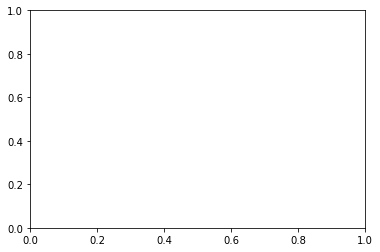

In [120]:
N = 2
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, x1, width, color='royalblue') # yerr=menStd)
womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, x2, width, color='seagreen') # yerr=womenStd
# add some
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )
ax.legend( (rects1[0], rects2[0]), ('NYC', 'NYC') )
plt.show()

/Users/jakeash/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

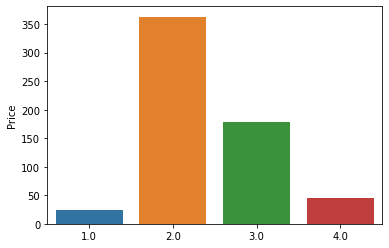

In [123]:
sns.barplot(x1,y1)